<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

### Graficamos f(x)

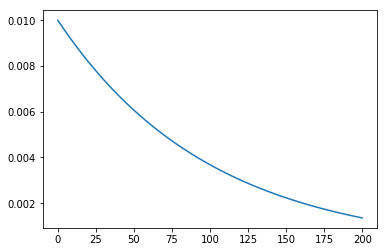

In [52]:
import numpy
import matplotlib.pyplot as plt

f = lambda x: 0.01*numpy.exp(-0.01*x)

plt.figure(1)

t1 = numpy.arange(0, 200, 0.1)
plt.plot(t1, f(t1))


### F.d.a de X

$$
fda ( x ) = \begin{cases}
~~ 1 - e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

### Probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse

In [53]:
fda = lambda x: 1 - numpy.exp(-0.01*x)

fda(150) - fda(50)

0.38340049956420363

### Probabilidad de que una computadora se descomponga antes de registrar 100 horas de uso

In [54]:
fda(100)

0.6321205588285577

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [58]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 7
sigma = 2
rng = range(-5, 20)

In [59]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       6.988009
std        2.018678
min       -0.452173
25%        5.651015
50%        6.978529
75%        8.320833
max       14.841951


/Users/rodrigocarranza/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


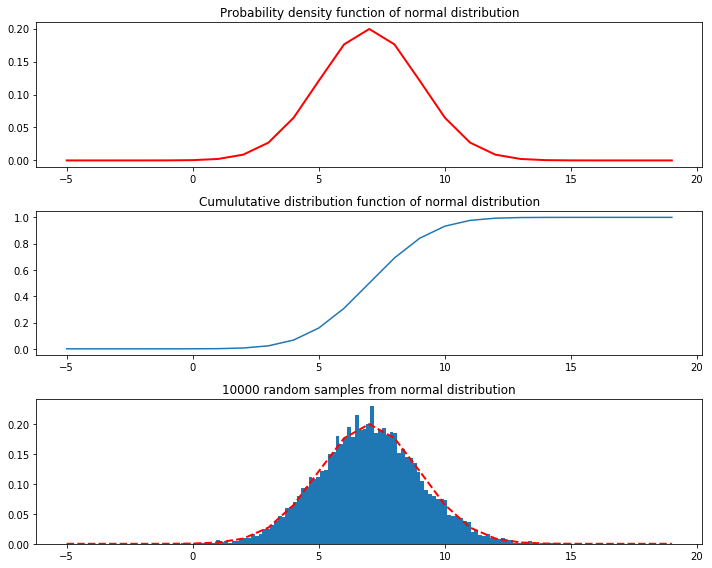

In [60]:
graphic_normal(mu, sigma, rng)

#### Analisis sobre las variables mu, sigma y rango

La variable "mu" representa el valor central en la campana de gauss. En una distribución normal con "mu" en 10 nos dice que la mayoría de los datos van a estar concentrados alrededor de este valor y la frecuencia disminuye a medida que nos alejamos de esta media tanto hacia la izquiera como hacia la derecha.

La variable "sigma" en cambio, refleja que tan concentrados estan los datos en la distribución. Es decir, para valores chicos de sigma como "1", los valores de la muestra aleatoria van a estar bastante pegados al valor de la media y por ende la campana va a tender a ser mucho mas empinada. Cuando el valor de sigma es grande, la campana se suaviza lo cual no dice que hay mayor dispersión de los datos por lo cual la campana tiende a ser mas abierta.

El rango solamente establece la escala visual que vamos a observar en los graficos. Si los valores del mismo estan cercanos al valor adoptado para "mu" y "sigma", entonces los graficos van a poder mostrar en mayor detalle como es la distribución. Valores grandes y muy alejados nos van a hacer perder información sobre lo que queremos ver.